<a href="https://colab.research.google.com/github/jsemprini/medicare_cah/blob/main/analyze_cah_rdd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#full analysis of CAH Dif-in-Disc Medicare Effect on Lung Cancer Survival in IA (1992-1998 and 2006-2010)

#Y = in P(Survival 2 years), Decrease in P(Distant Dx)


In [48]:
library(dplyr)

In [49]:
install.packages('lmtest')
install.packages('tidyverse')
install.packages('stargazer')
install.packages("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:


theme_Publication <- function(base_size=14, base_family="helvetica") {
  library(grid)
  library(ggthemes)
  (theme_foundation(base_size=base_size, base_family=base_family)
    + theme(plot.title = element_text(face = "bold",
                                      size = rel(1.2), hjust = 0.5),
            text = element_text(),
            panel.background = element_rect(colour = NA),
            plot.background = element_rect(colour = NA),
            panel.border = element_rect(colour = NA),
            axis.title = element_text(face = "bold",size = rel(1)),
            axis.title.y = element_text(angle=90,vjust =2),
            axis.title.x = element_text(vjust = -0.2),
            axis.text = element_text(),
            axis.line = element_line(colour="black"),
            axis.ticks = element_line(),
            panel.grid.major = element_line(colour="#f0f0f0"),
            panel.grid.minor = element_blank(),
            legend.key = element_rect(colour = NA),
            legend.position = "bottom",
            legend.direction = "horizontal",
            legend.key.size= unit(0.2, "cm"),
            legend.margin = unit(0, "cm"),
            legend.title = element_text(face="italic"),
            plot.margin=unit(c(10,5,5,5),"mm"),
            strip.background=element_rect(colour="#f0f0f0",fill="#f0f0f0"),
            strip.text = element_text(face="bold")
    ))

}

scale_fill_Publication <- function(...){
  library(scales)
  discrete_scale("fill","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

scale_colour_Publication <- function(...){
  library(scales)
  discrete_scale("colour","Publication",manual_pal(values = c("#386cb0","#fdb462","#7fc97f","#ef3b2c","#662506","#a6cee3","#fb9a99","#984ea3","#ffff33")), ...)

}

library("ggplot2")
library("ggthemes")

In [51]:
library(readr)
file_path <- "/content/cah_all.csv"  # Update with the actual file path
df <- read_csv(file_path)

df <- subset(df, year<2011)

# Display the structure of the loaded data
str(df)

# Display the first few rows of the data
head(df)

Rows: 2079337 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): county, ruc10, state, race_ethnic, marital, sex
dbl (20): age, year, post, cah, fd, fips, metro, urban, rural, num_surv, n_b...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tibble [1,291,170 × 26] (S3: tbl_df/tbl/data.frame)
 $ age         : num [1:1291170] 75 64 55 49 54 58 47 55 72 46 ...
 $ year        : num [1:1291170] 2009 1993 2008 2008 2007 ...
 $ post        : num [1:1291170] 1 0 1 1 1 1 1 1 0 1 ...
 $ cah         : num [1:1291170] 0 0 0 0 0 0 0 0 0 0 ...
 $ fd          : num [1:1291170] 0 0 0 0 0 0 0 0 0 0 ...
 $ county      : chr [1:1291170] "02900" "02900" "02900" "02900" ...
 $ fips        : num [1:1291170] 2900 2900 2900 2900 2900 2900 2900 2900 2900 2900 ...
 $ ruc10       : chr [1:1291170] "Unknown/missing/no match (Alaska or Hawaii - Entire State)" "Unknown/missing/no match (Alaska or Hawaii - Entire State)" "Unknown/missing/no match (Alaska or Hawaii - Entire State)" "Unknown/missing/no match (Alaska or Hawaii - Entire State)" ...
 $ metro       : num [1:1291170] NA NA NA NA NA NA NA NA NA NA ...
 $ urban       : num [1:1291170] NA NA NA NA NA NA NA NA NA NA ...
 $ rural       : num [1:1291170] NA NA NA NA NA NA NA NA NA NA ...
 $ state  

age,year,post,cah,fd,county,fips,ruc10,metro,urban,⋯,n_beds,distant,alive2,lung,prostate,femalebreast,pancreas,crc,localized,regional
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,2009,1,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,0,1,NA,NA,NA,NA,1,0,1
64,1993,0,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,0,1,NA,NA,NA,NA,NA,1,0
55,2008,1,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,NA,1,NA,NA,NA,NA,NA,NA,NA
49,2008,1,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,0,1,NA,NA,1,NA,NA,0,1
54,2007,1,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,0,0,NA,NA,NA,NA,NA,0,1
58,2008,1,0,0,02900,2900,Unknown/missing/no match (Alaska or Hawaii - Entire State),NA,NA,⋯,0,1,0,NA,NA,NA,1,NA,0,0


Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 210080 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


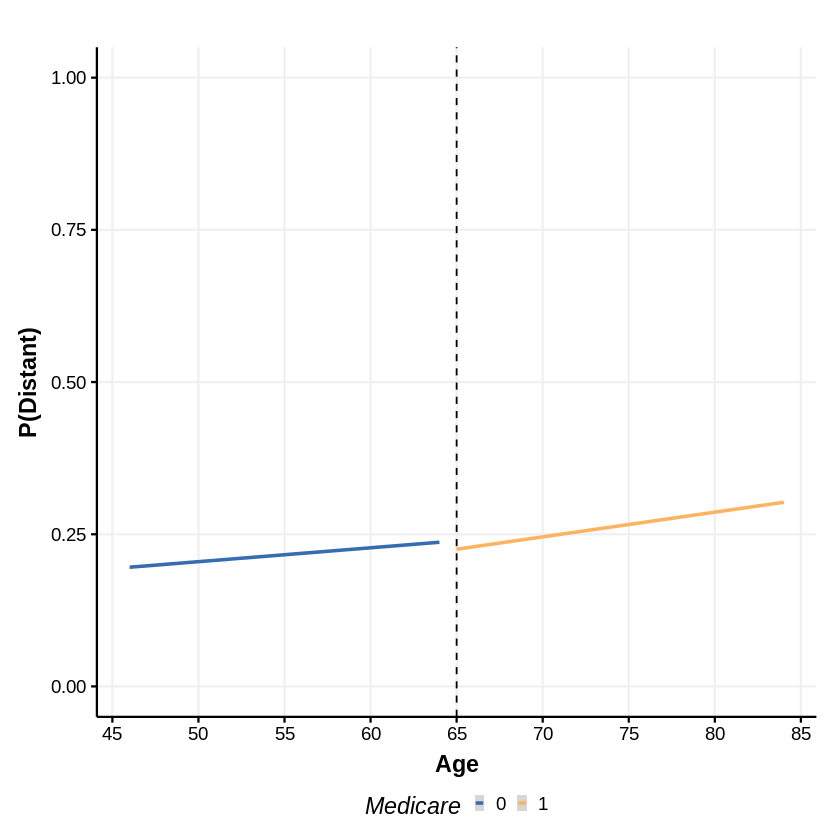

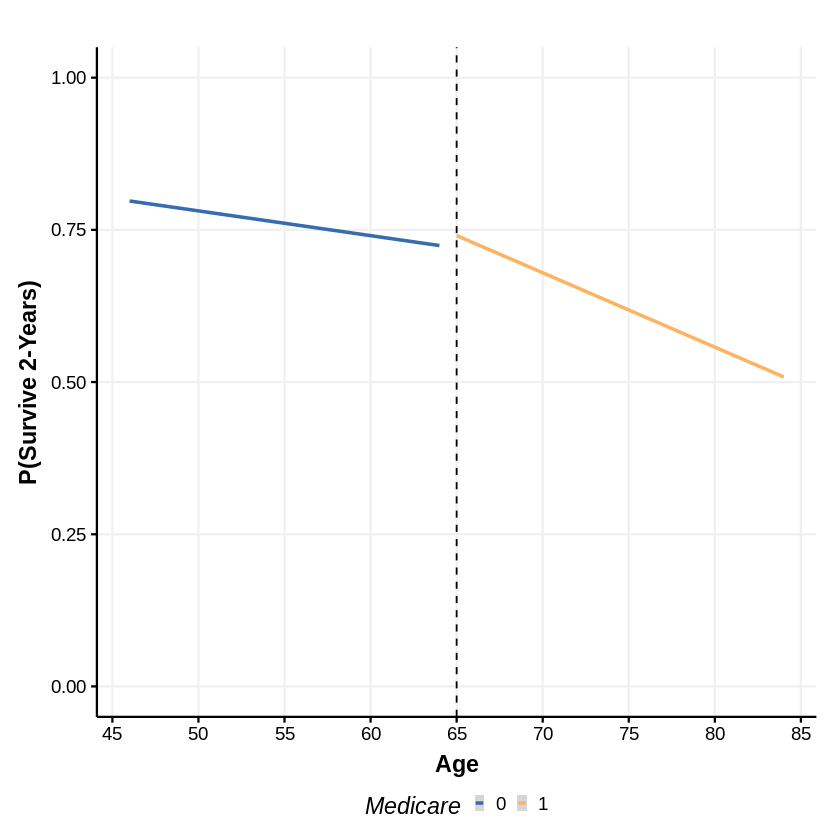

In [52]:
library(tidyverse)


df <- df %>%
  mutate(
    medicare  = if_else(age >= 65, 1, 0)
  )


ggplot(aes(age, distant, colour = factor(medicare)), data = df) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = df) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + labs(colour='Medicare') + theme_Publication()

In [53]:
df$groups <- ifelse(df$post == 0 & df$cah ==0, "Pre, Control", "_")
df$groups <- ifelse(df$post == 1 & df$cah ==0, "Post, Control", df$groups)
df$groups <- ifelse(df$post == 0 & df$cah ==1, "Pre, Tx", df$groups)
df$groups <- ifelse(df$post == 1 & df$cah ==1, "Post, Tx", df$groups)


summary(df$cah)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3686  1.0000  1.0000 

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 210080 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


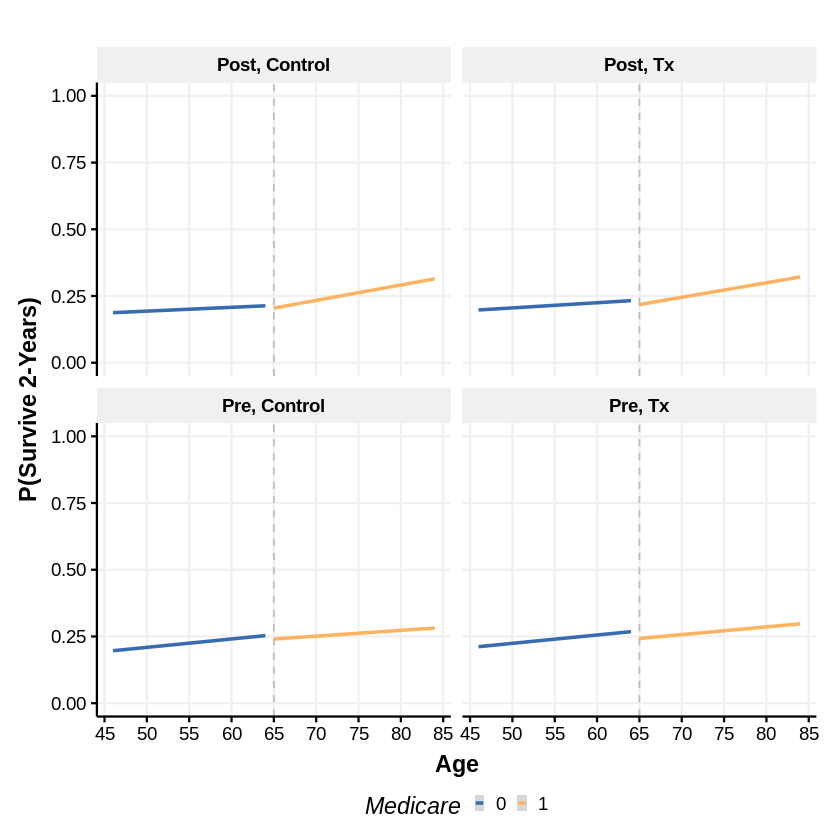

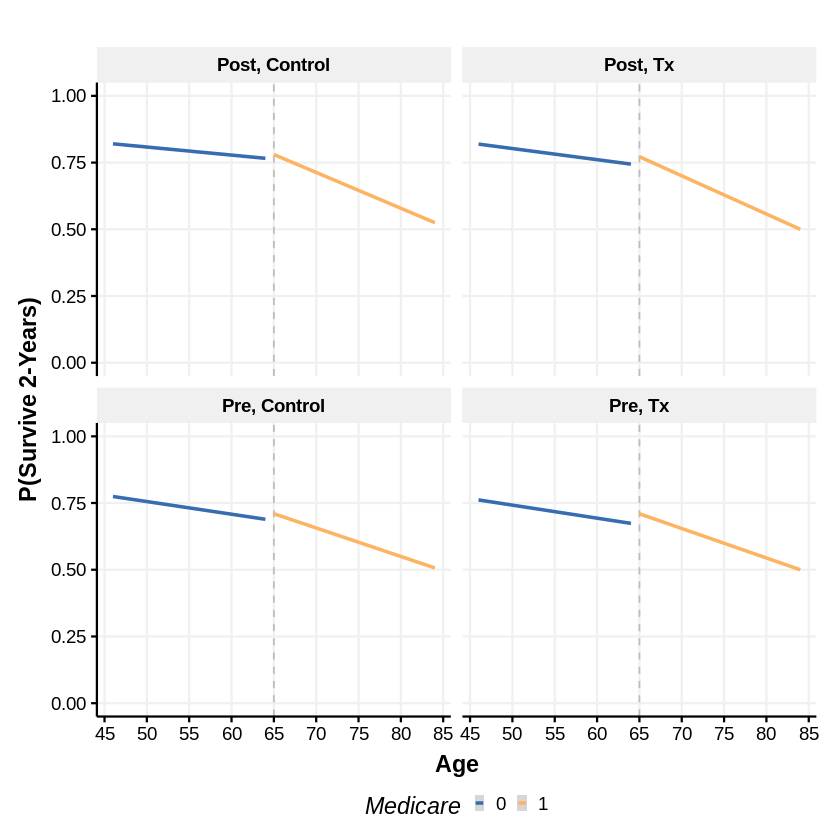

In [54]:

# figure
ggplot(aes(age, distant, colour = factor(medicare)), data = df) +
  geom_vline(xintercept = 65, colour = "grey", linetype = 2) +
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') +
facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = df) +
  geom_vline(xintercept = 65, colour = "grey", linetype = 2) +
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') +
facet_wrap(~ groups)

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 14065 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


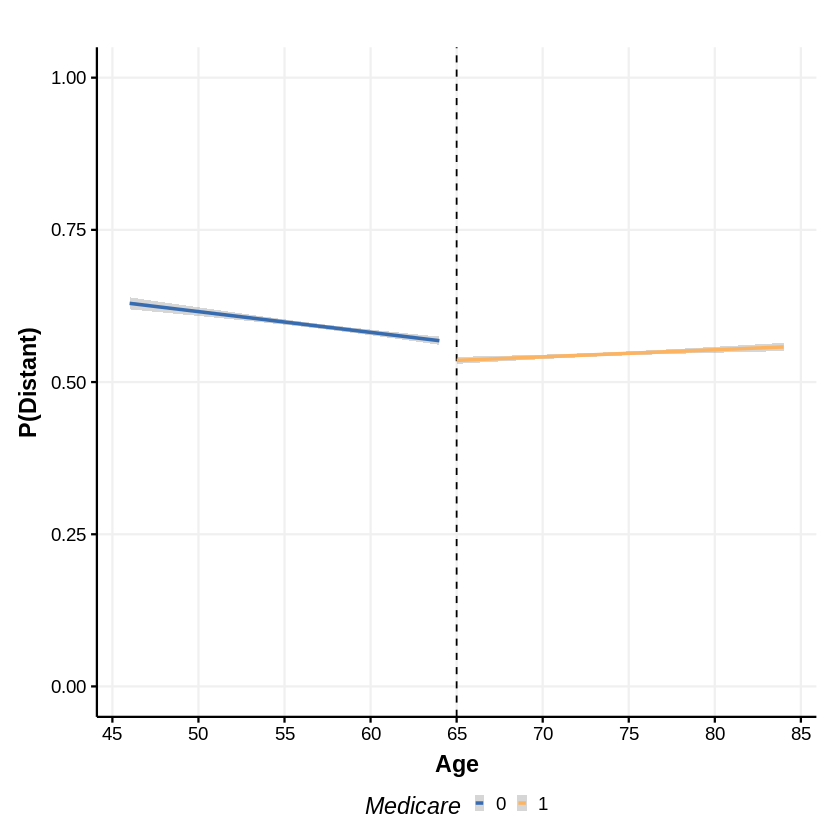

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 14065 rows containing non-finite values (`stat_smooth()`).”


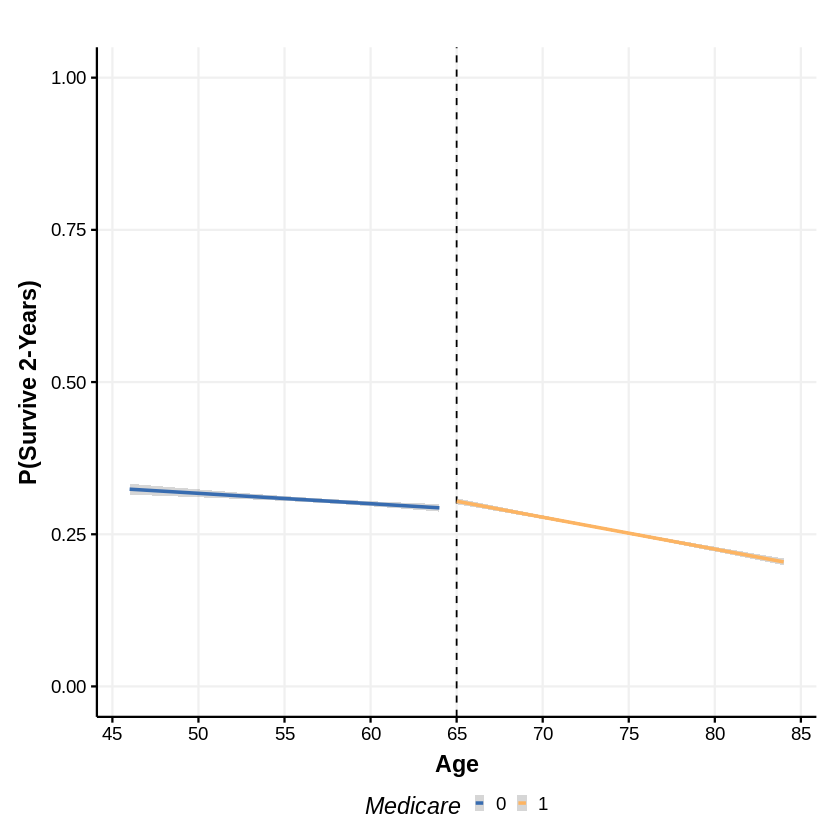

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


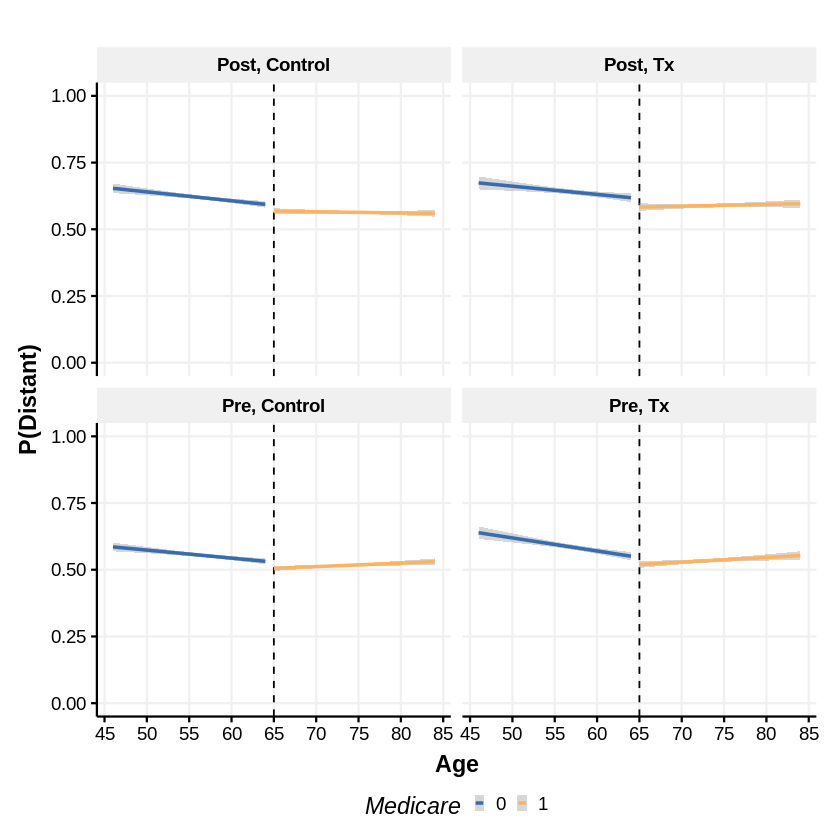

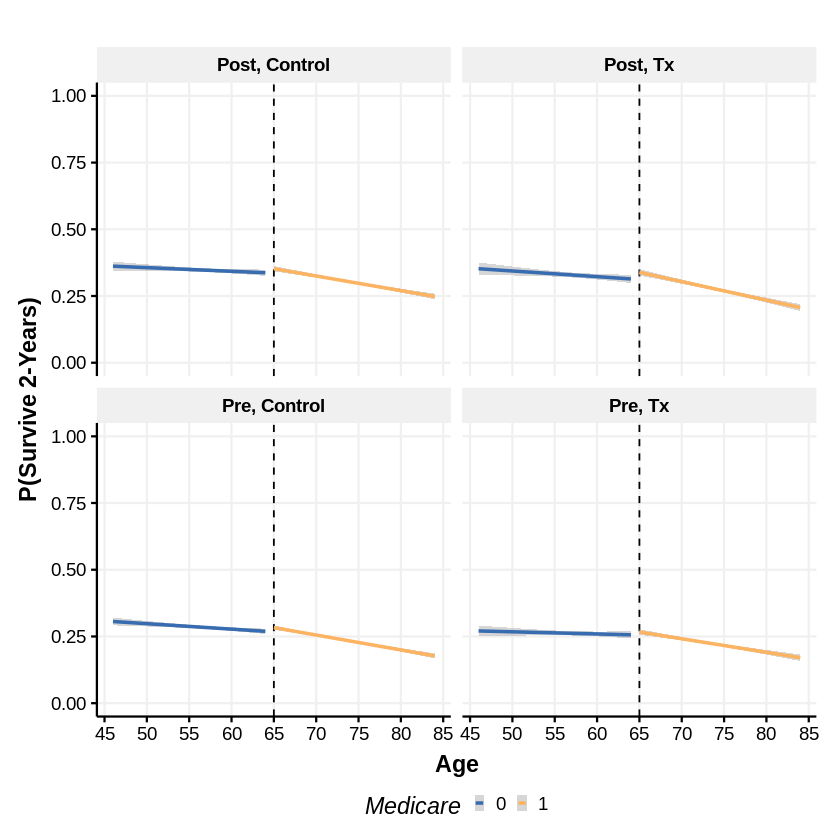

In [55]:

# figure - lung

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, lung %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, lung %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')




ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, lung %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, lung %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ groups)



Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 54836 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


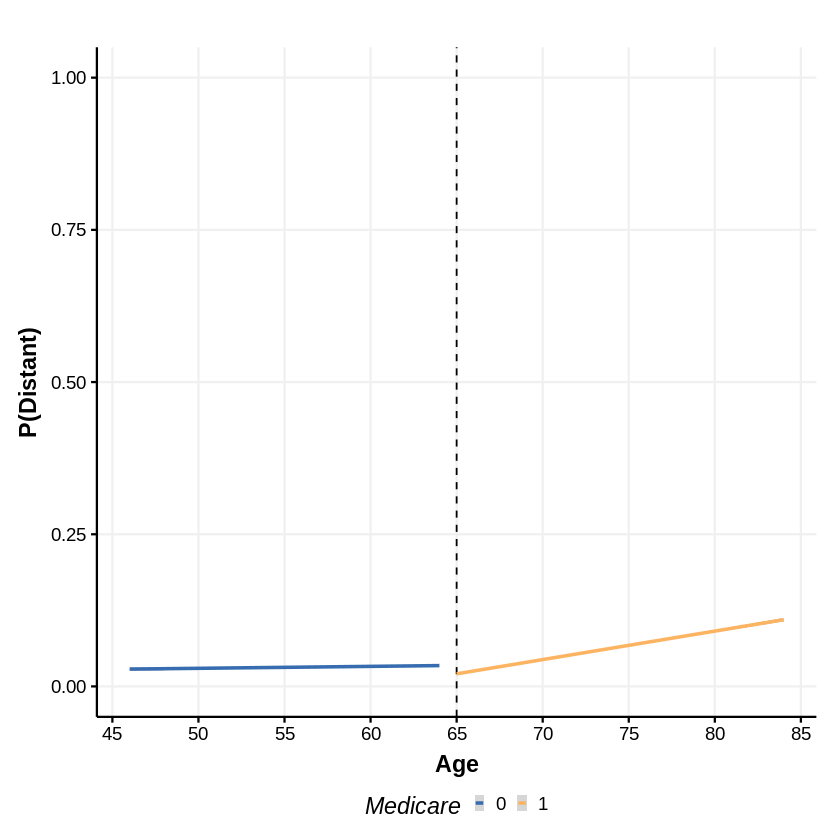

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 54836 rows containing non-finite values (`stat_smooth()`).”


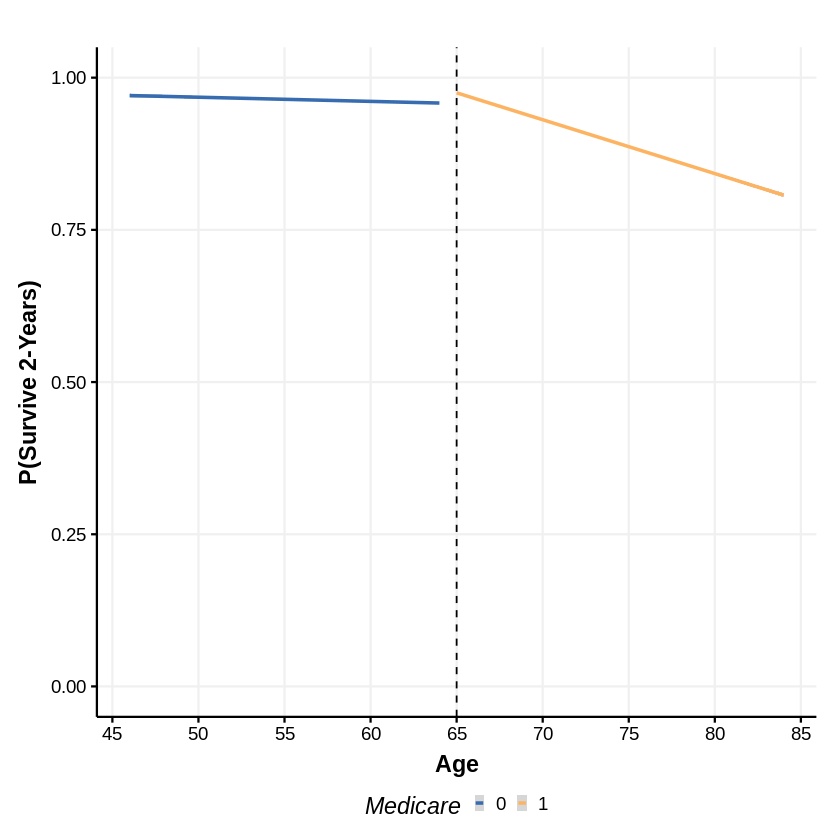

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


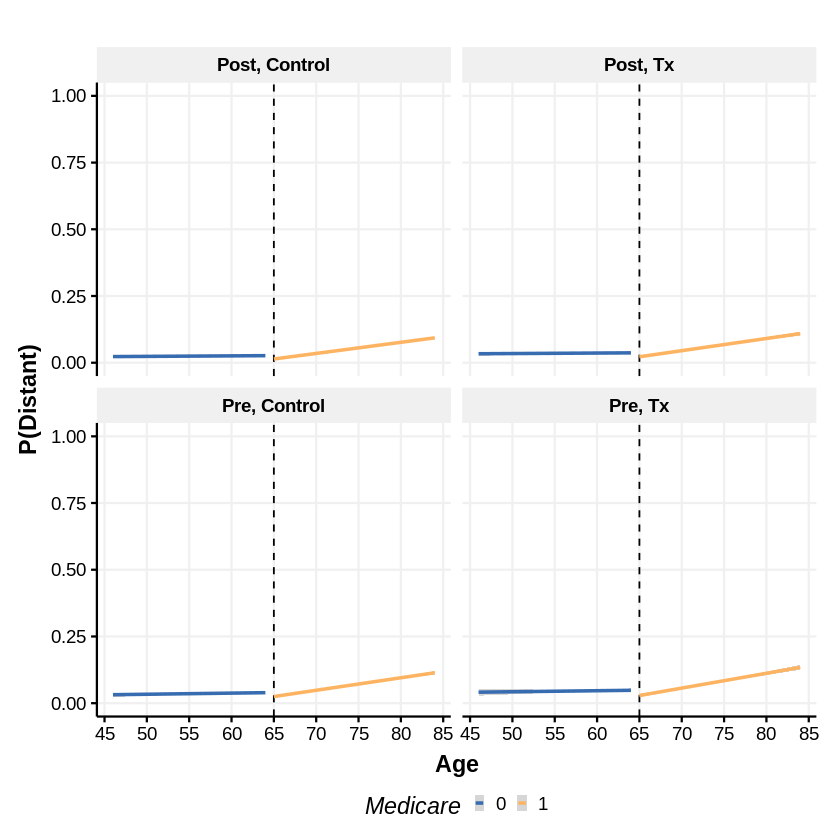

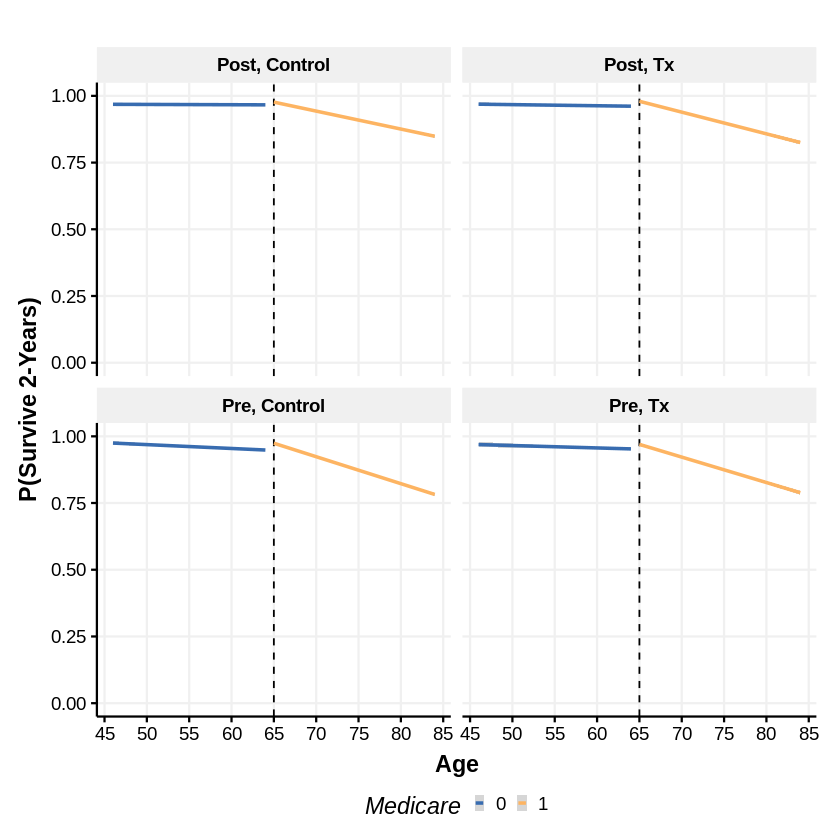

In [56]:

# figure - prostate

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, prostate %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, prostate %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')




ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, prostate %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, prostate %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ groups)



Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4106 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


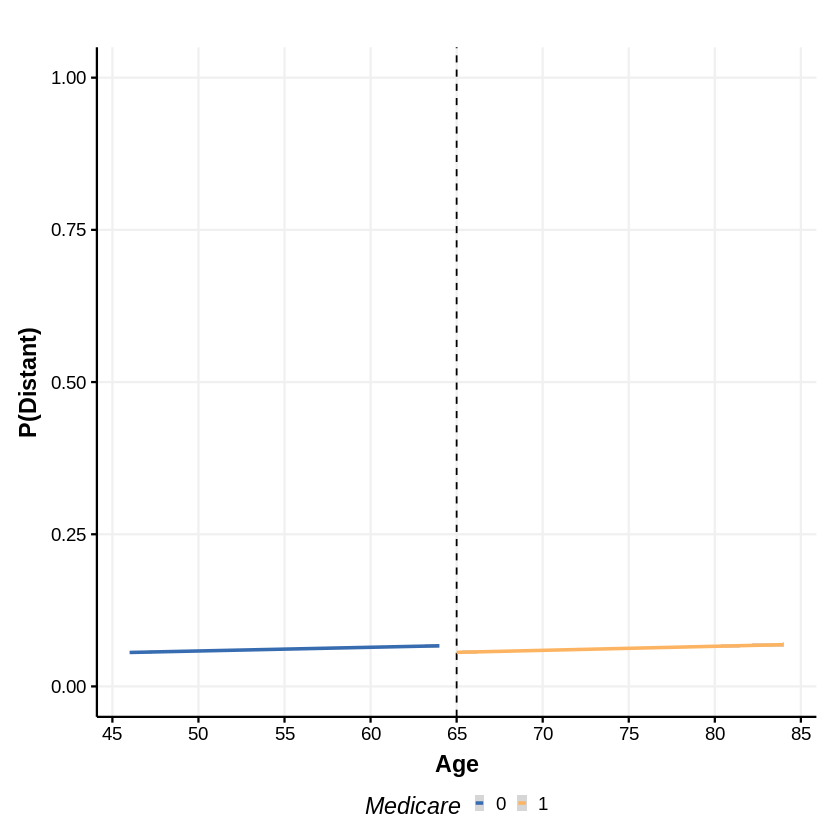

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4106 rows containing non-finite values (`stat_smooth()`).”


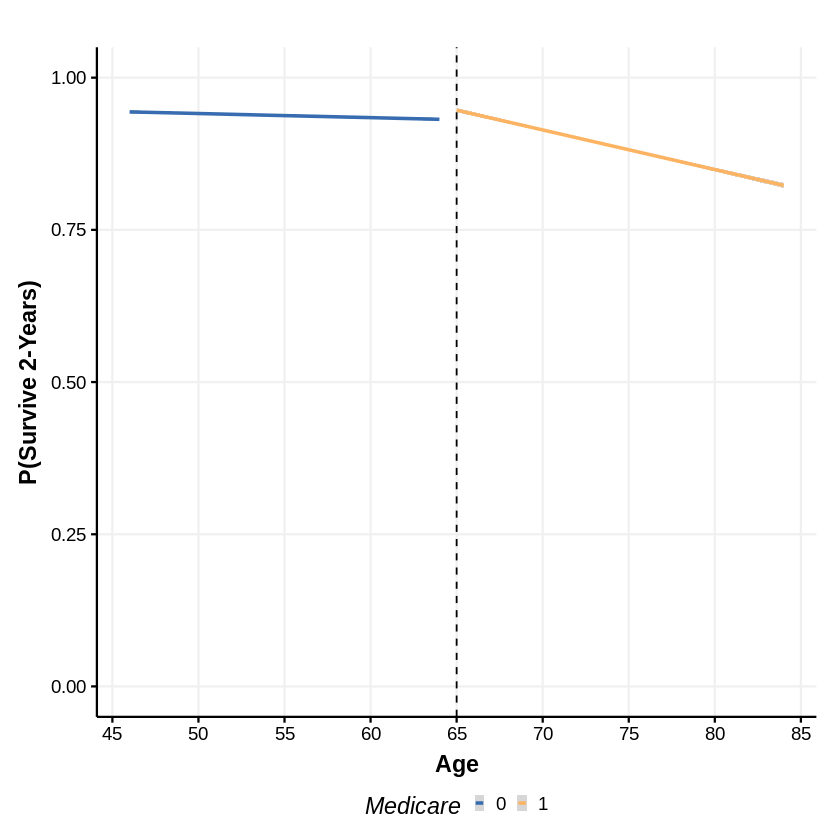

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


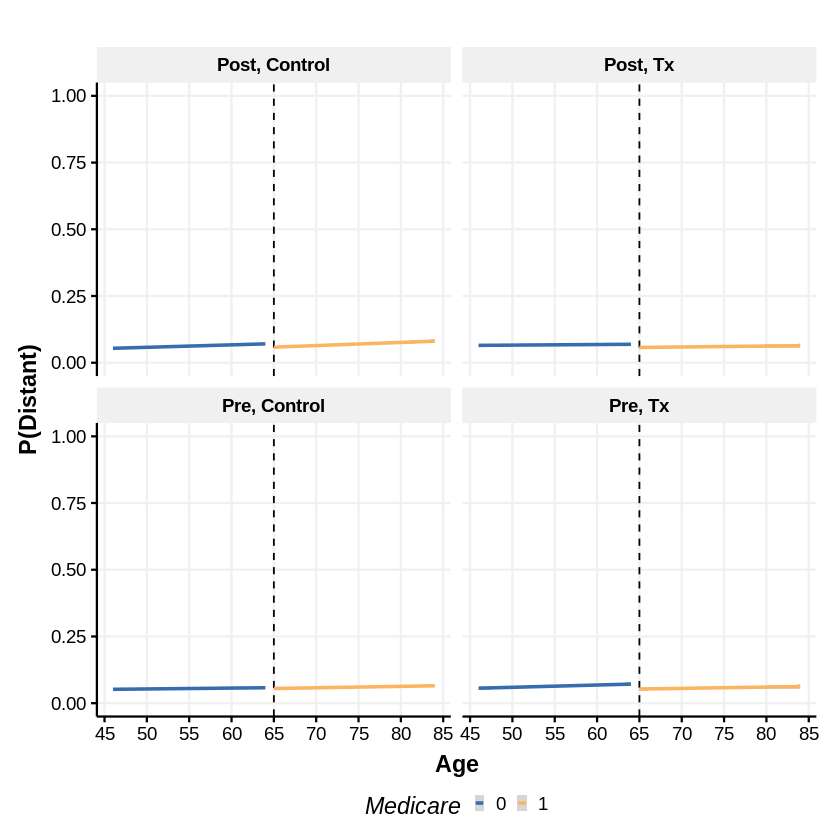

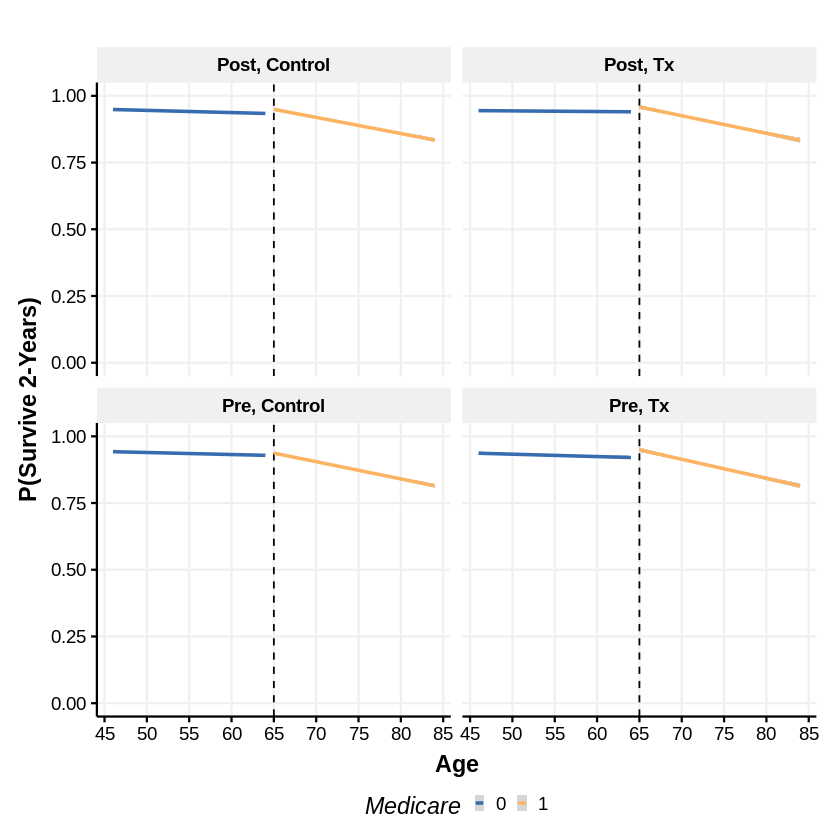

In [57]:

# figure - femalebreast

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, femalebreast %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, femalebreast %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')




ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, femalebreast %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, femalebreast %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ groups)



Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4011 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


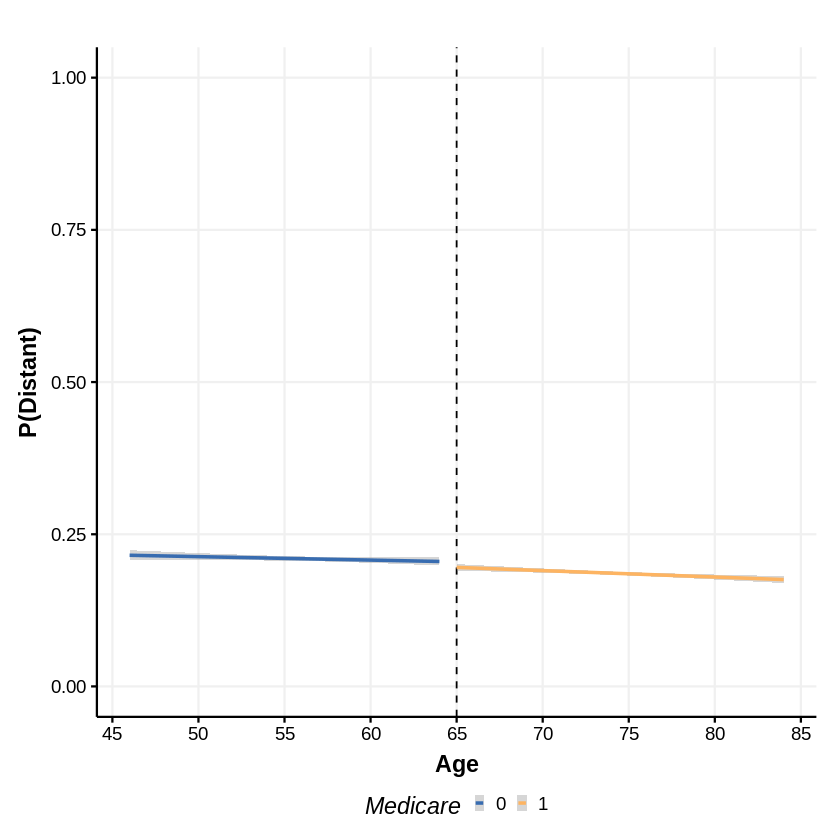

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4011 rows containing non-finite values (`stat_smooth()`).”


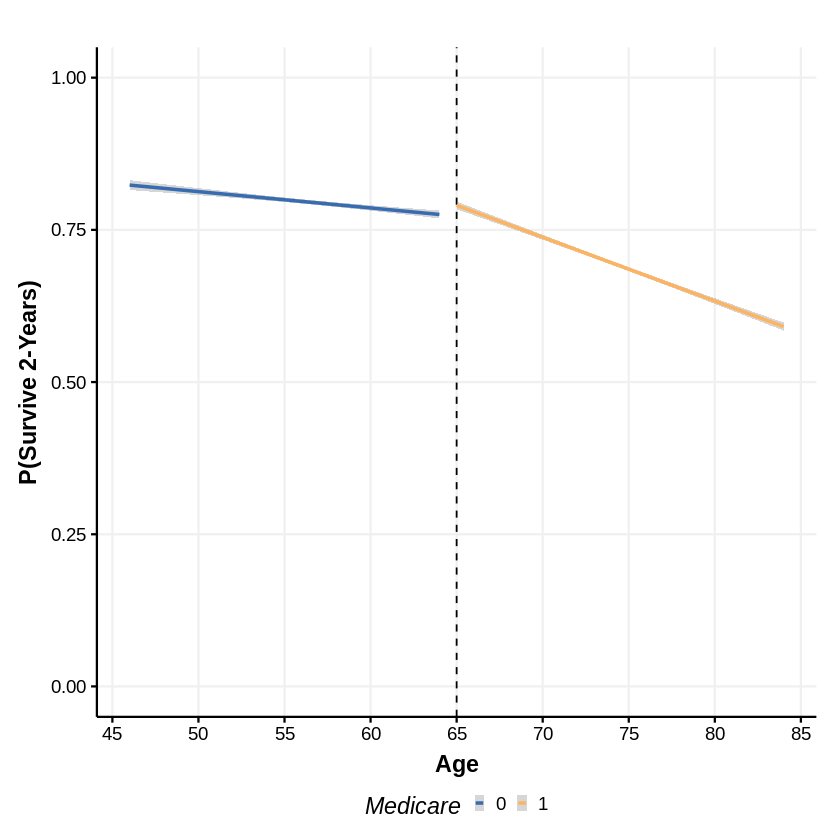

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


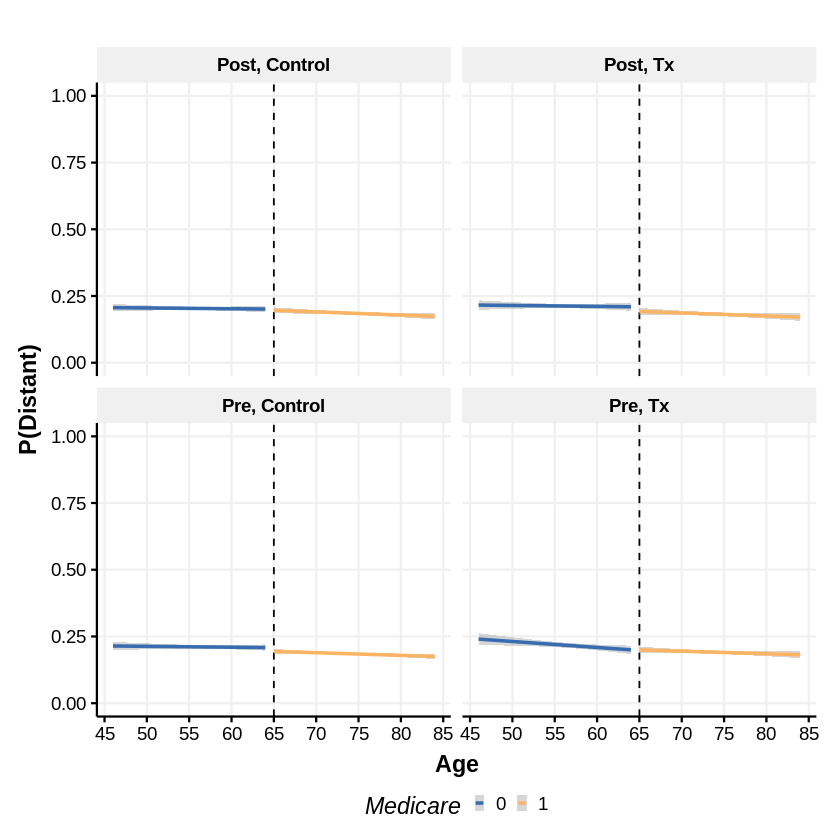

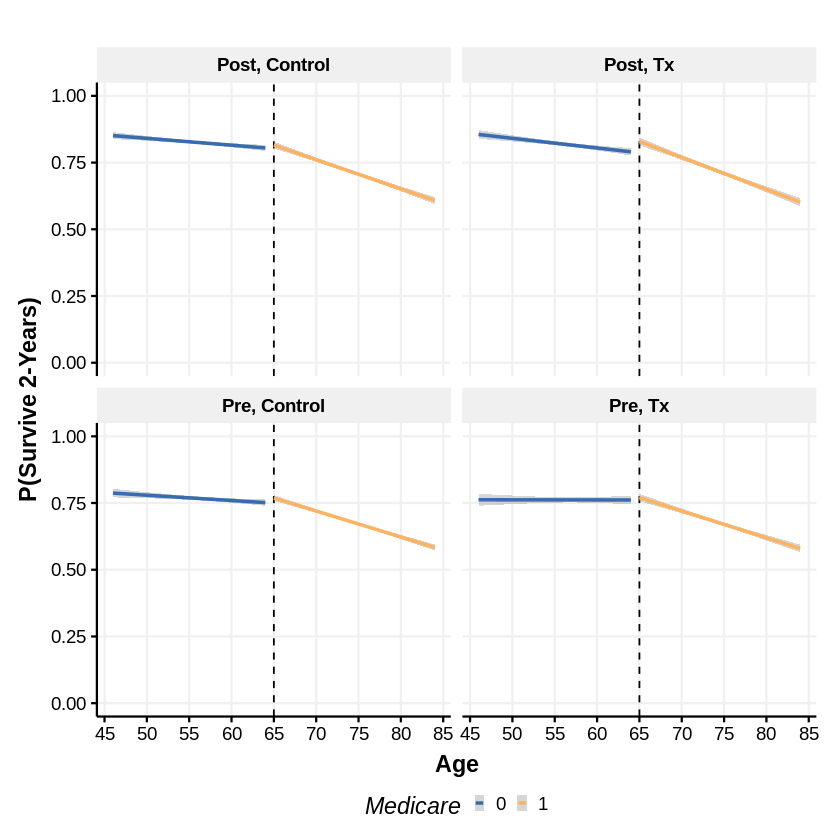

In [58]:

# figure - crc

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, crc %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, crc %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')




ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, crc %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, crc %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ groups)



Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4312 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


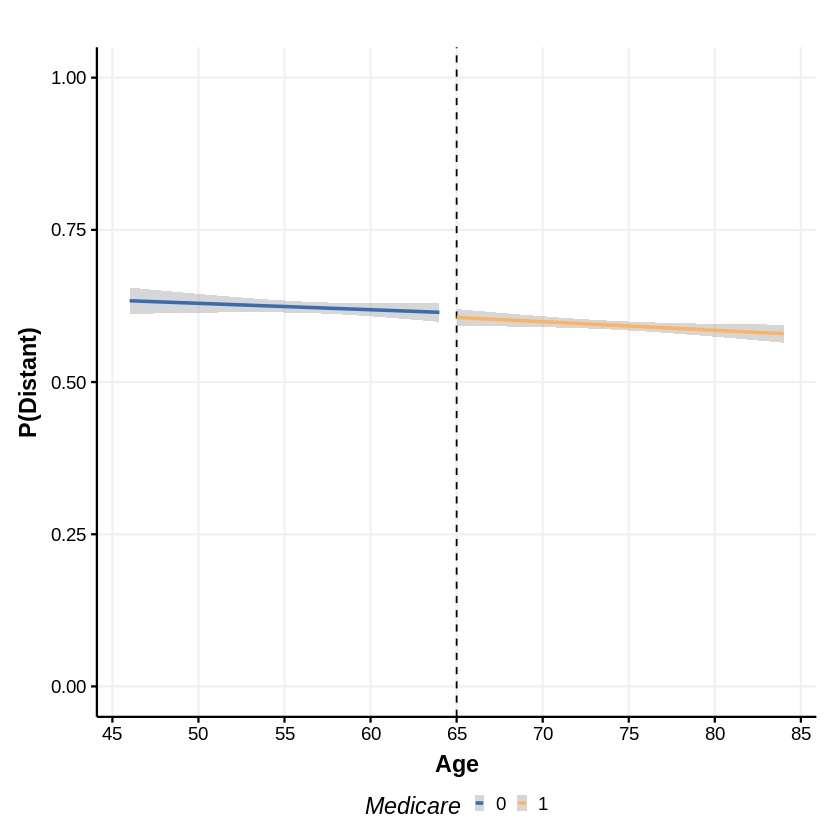

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4312 rows containing non-finite values (`stat_smooth()`).”


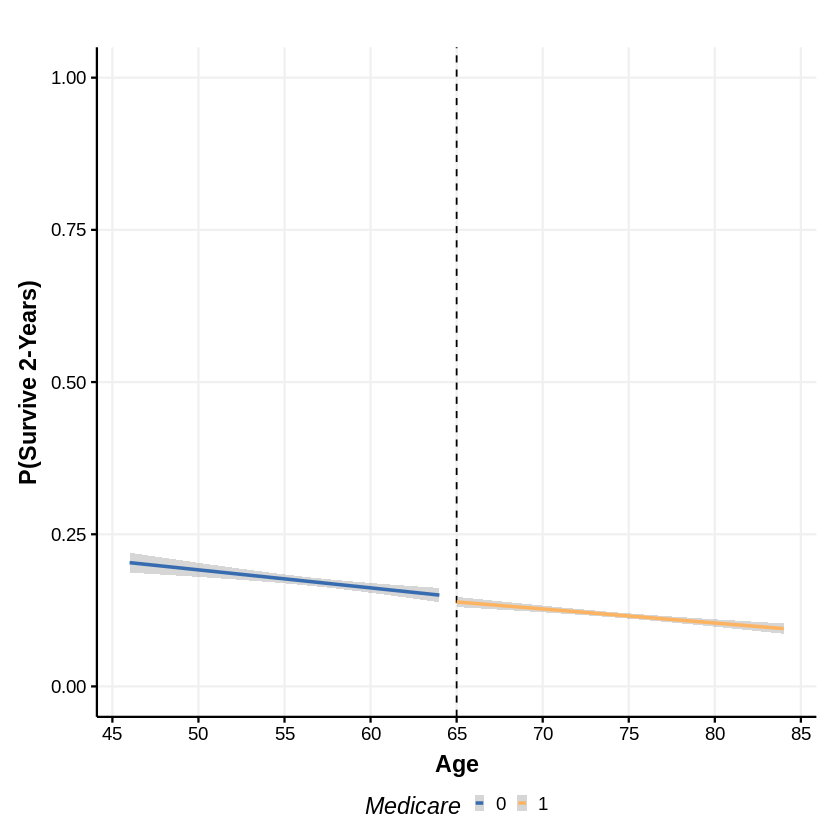

Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


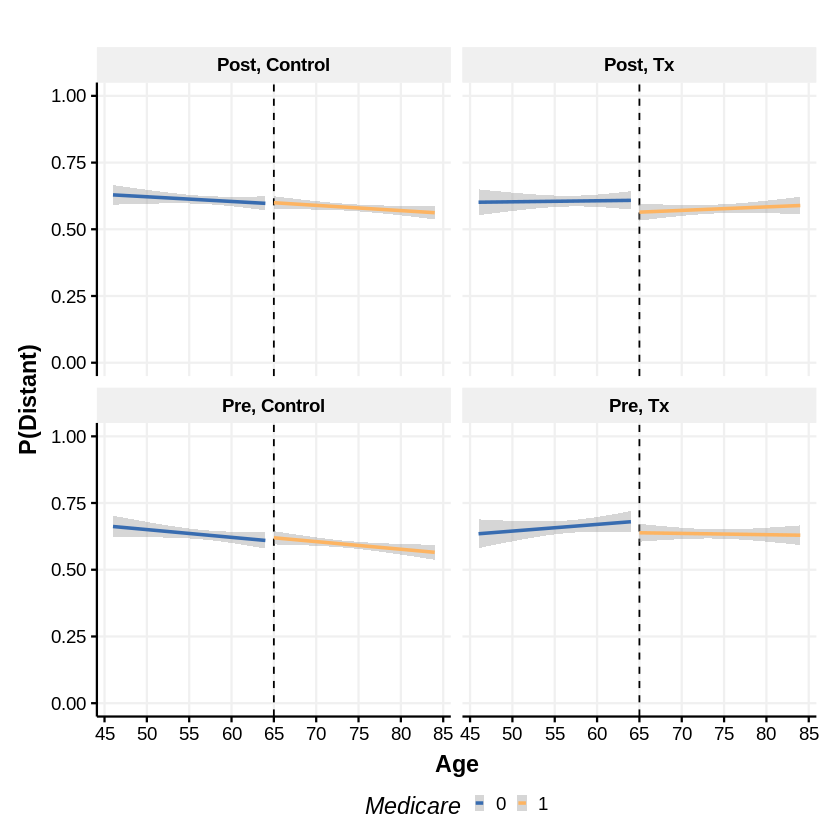

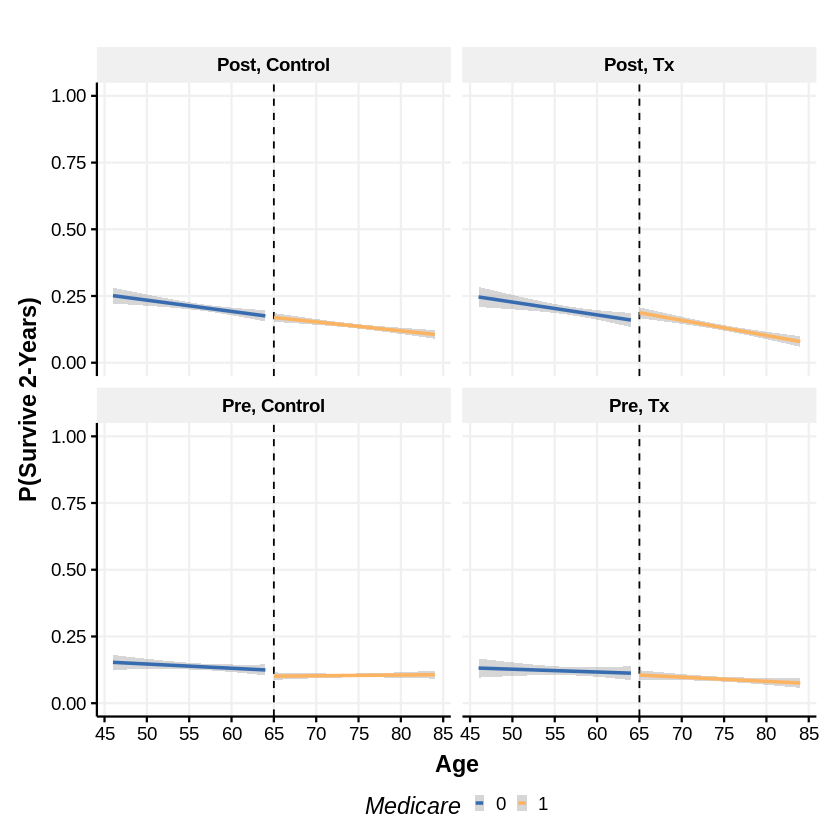

In [59]:

# figure - pancreas

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, pancreas %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare')

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, pancreas %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare')




ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, pancreas %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ groups)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, pancreas %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ groups)



Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 79756 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“`legend.margin` must be specified using `margin()`
ℹ For the old behavior use `legend.spacing`”
`geom_smooth()` using formula = 'y ~ x'


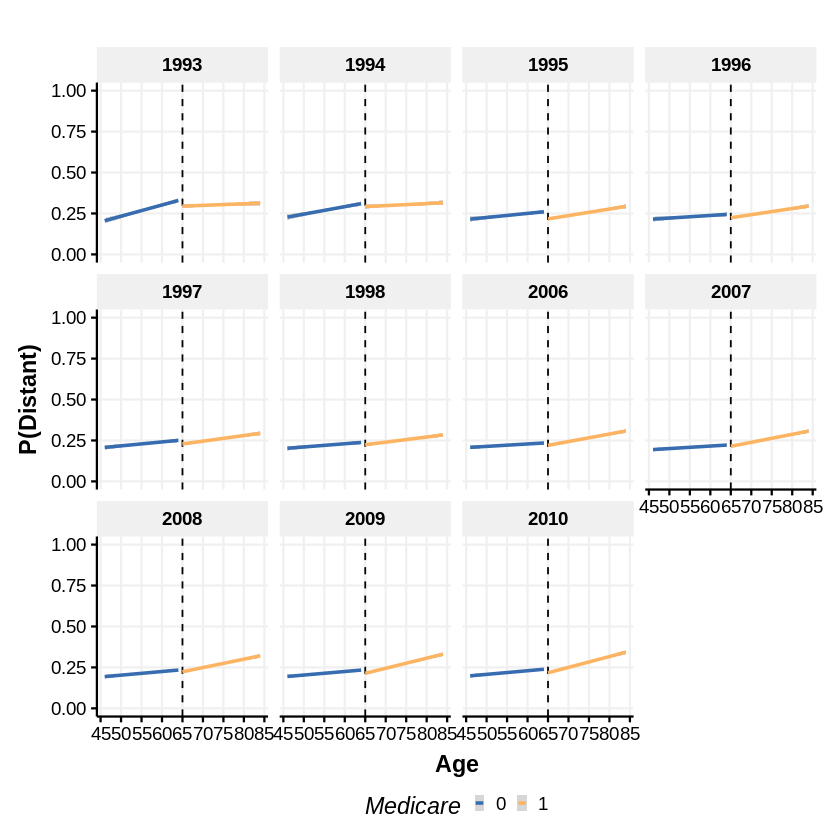

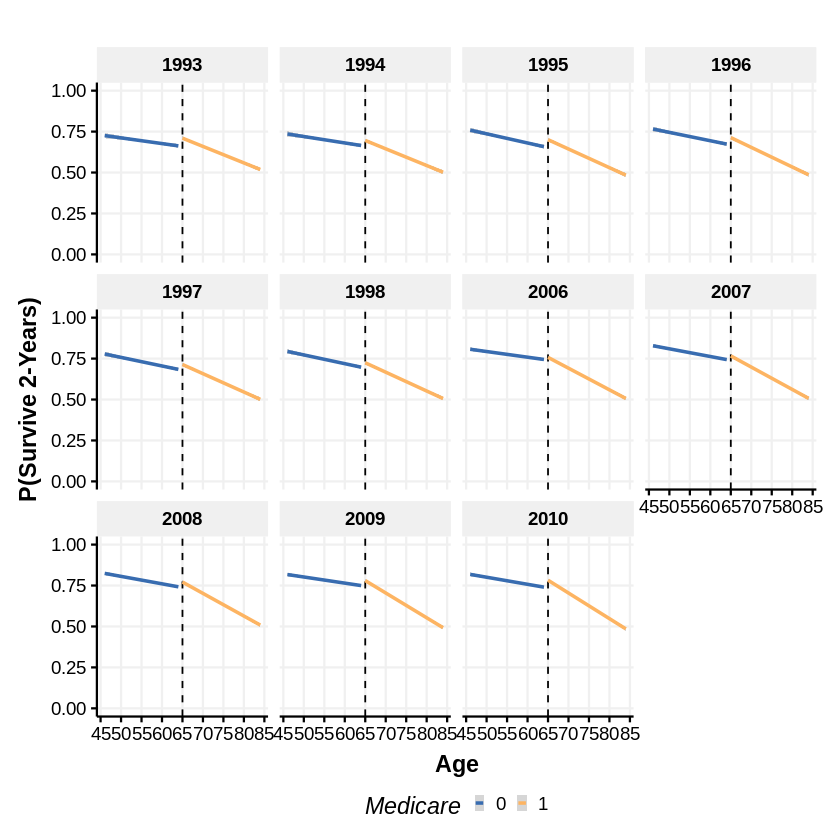

In [60]:

# figure - by state

ggplot(aes(age, distant, colour = factor(medicare)), data = subset(df, cah %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") +
labs(x = "Age", y = "P(Distant)") + ylim(0,1) +   scale_x_continuous(breaks = seq(45, 85, by = 5)) +
 scale_colour_Publication() + theme_Publication()  + labs(colour='Medicare') + facet_wrap(~ year)

ggplot(aes(age, alive2, colour = factor(medicare)), data = subset(df, cah %in% "1")) +
  geom_vline(xintercept = 65, colour = "black", linetype = 2)+
  stat_smooth(method = "lm") + ylim(0,1) +  scale_x_continuous(breaks = seq(45, 85, by = 5))  +
labs(x = "Age", y = "P(Survive 2-Years)") +  scale_colour_Publication() + theme_Publication() + labs(colour='Medicare') + facet_wrap(~ year)

